#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Mounting the Drive
**To read the file (Dataset)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/Datasets/Titanic.csv' #dataset file path

#**Data Preprocessing**



##Data Collection

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Duplicate Record

In [ ]:
print(f'The Number of Duplicate Records Are: {df.duplicated().sum()}')

The Number of Duplicate Records Are: 0


**Total Instances:** 891 <br>
**with zero duplicate record.**<br>
**11 Features + Target Variable: "Survived"**

In [ ]:
df.shape

(891, 12)

##**Features Overview**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**All features are numerical except Name, Sex, Ticket, Cabin and Embarked.**

##**Lets understand the relationship between different features and the target variable (Survived).**

**Features Names**

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Unique Value Counts**

In [ ]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

**Desired Features for the countplot**

In [ ]:
count_feat = ['Survived', 'Pclass', 'Parch', 'Sex', 'Embarked', 'SibSp']
count_feat

['Survived', 'Pclass', 'Parch', 'Sex', 'Embarked', 'SibSp']

**CountPlot**

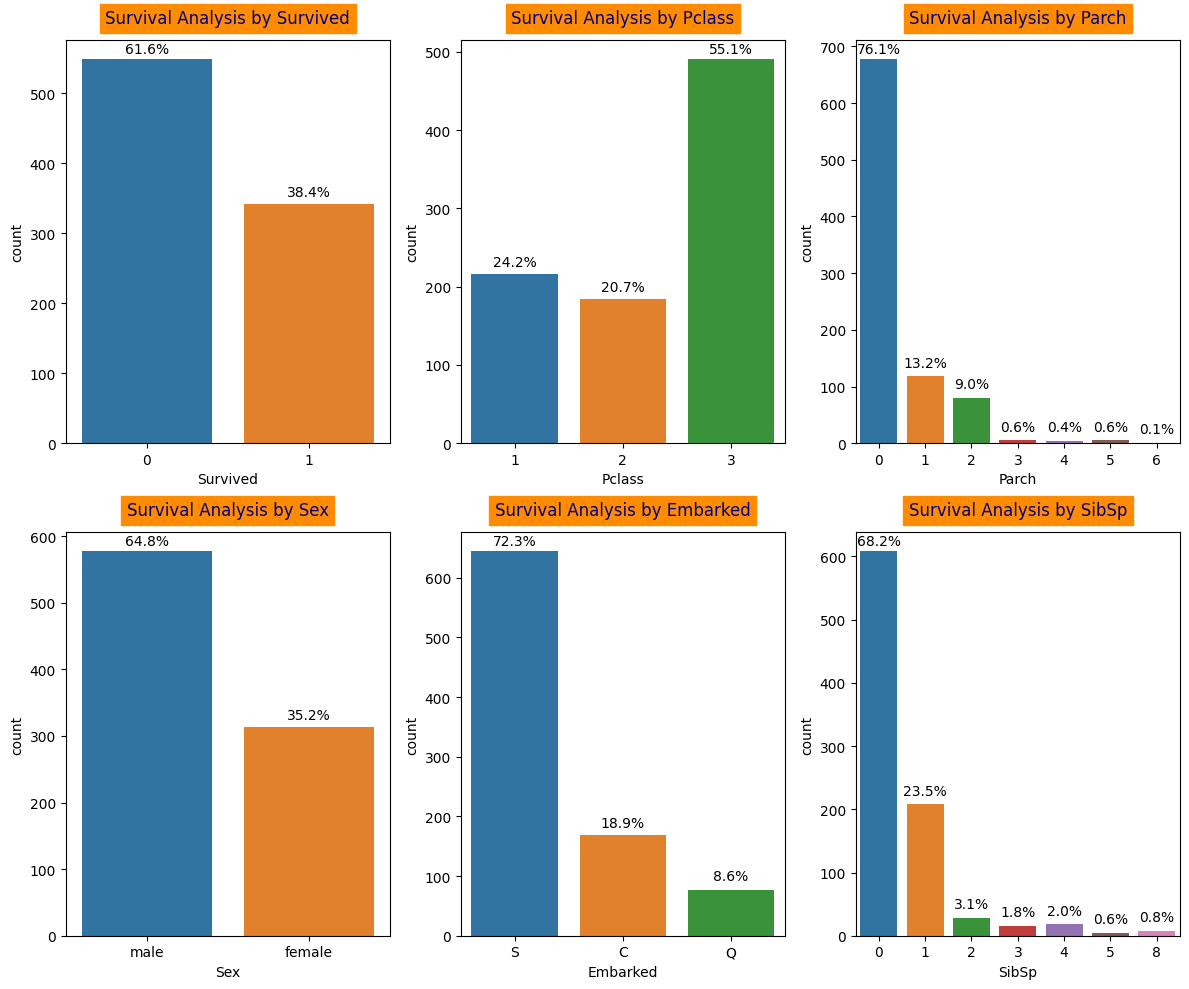

In [ ]:
rows = 2
col = 3

fig, axes = plt.subplots(nrows=rows, ncols=col, figsize=(col*rows+2*col, col*rows+2*rows))
for i in range(rows):
  for j in range(col):
    sns.countplot(x=count_feat[i*col+j], data=df, ax=axes[i,j])
    axes[i,j].set_title(f'Survival Analysis by {count_feat[i*col+j]}',  color='darkblue',
                        backgroundcolor='darkorange', pad=12)

    # Calculate and add percentage labels
    total = len(df)
    for p in axes[i,j].patches:
      percentage = f'{100 * p.get_height() / total:.1f}%'
      axes[i,j].annotate(percentage, (p.get_x() + p.get_width() / 2., 0.99*p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                        textcoords='offset points')

plt.tight_layout()
plt.show()


**Basic Statistics**

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1. **Count**: This column shows the number of non-missing (non-null) values for each column. It appears that the "Age" column has missing values since it has a count of 714, which is less than the total number of rows (891).

2. **Mean**: The "mean" row provides the average value for each column. For example, the average age of passengers in your dataset is approximately 29.7 years, and the mean survival rate is around 0.38, which means that approximately 38% of passengers survived. **(And we already have observed the survival percentage above in the `CountPlot`**

3. **Std**: The "std" row represents the standard deviation, which measures the spread or variability of the data. For instance, the standard deviation of the "Age" column is about 14.5, indicating how much individual ages vary from the mean.

4. **Min**: This row shows the minimum value for each column. For instance, the minimum age in the dataset is 0.42 years, and the minimum fare is 0. This is useful for identifying potential outliers.

5. **25%**: The 25th percentile (first quartile) value is shown here. It represents the value below which 25% of the data falls. For example, the 25th percentile for "Age" is 20.125, which means that 25% of passengers are younger than 20.125 years.

6. **50%**: The 50th percentile (median) value is the middle value of the dataset. For "Age," the median age is 28, indicating that half of the passengers are younger than 28 years.

7. **75%**: The 75th percentile (third quartile) is provided, indicating the value below which 75% of the data falls. For example, the 75th percentile for "Age" is 38, meaning that 75% of passengers are younger than 38 years.

8. **Max**: The maximum value for each column is given. For example, the maximum age is 80 years, and the maximum fare is 512.33.

##**Missing Values Count**

In [ ]:
df.isnull().sum().sort_values(ascending=0)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

**Feature Age, Cabin and Embarked have missing values**

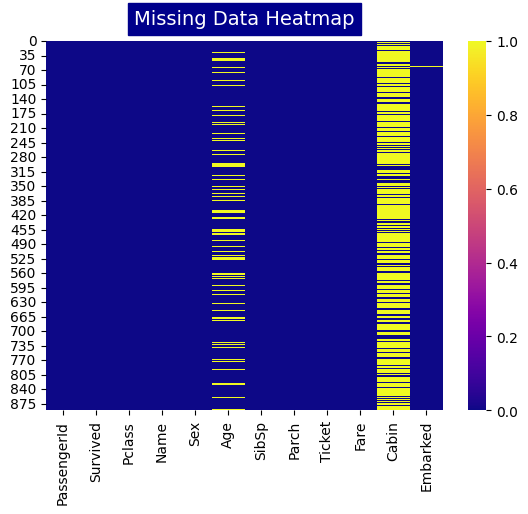

In [ ]:
sns.heatmap(df.isnull(), cmap='plasma')
plt.title('Missing Data Heatmap', backgroundcolor='darkblue', color='white',
          fontsize=14, pad=12)
plt.show()

**Missing Values Percentage:**

In [ ]:
Total = df.shape[0]
Missing = df.isnull().sum()
Percentage = round((Missing/Total)*100,2).apply(lambda x: f'{x:.2f} %')
df1 = pd.concat([Missing, Percentage], axis=1, keys=['Total Missing', 'Percentage'])
df1.sort_values(by='Percentage', ascending=0)

,Total Missing,Percentage
Cabin,687,77.10 %
Age,177,19.87 %
Embarked,2,0.22 %
PassengerId,0,0.00 %
Survived,0,0.00 %
Pclass,0,0.00 %
Name,0,0.00 %
Sex,0,0.00 %
SibSp,0,0.00 %
Parch,0,0.00 %


#**Imputation**

##**Imputation of Cabin Feature**

**Since approximately 77% of the `Cabin` values are missing, it might be challenging to impute them accurately. So, lets consider droping this feature.**

In [ ]:
df.drop('Cabin', axis=1, inplace=True)

##**Imputation of Age Feature**

**Let's check the distribution of the "Age" feature to decide the appropriate imputation**

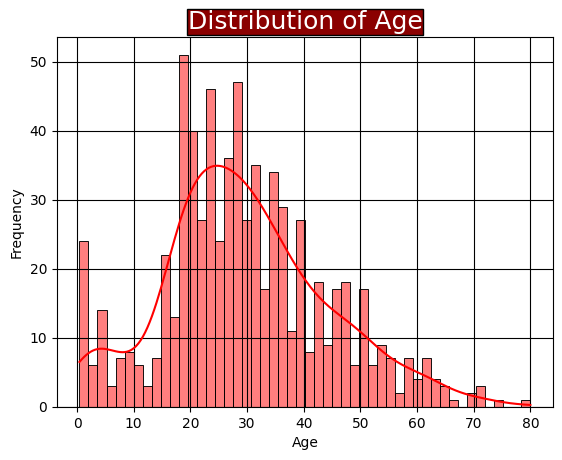

In [ ]:
sns.histplot(df['Age'], bins=50, kde=True, color='red')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age', fontsize=18, color='white', bbox={'facecolor': 'darkred', 'alpha': 1, 'pad': 0.8})
ax=plt.gca()
ax.spines[['top','bottom','left','right']].set_color('black')
plt.grid(color='black')
plt.show()

**Above you can see, the "Age" feature has a skewed distribution. So, median imputation would be better choice. But the boxplot below suggest that Age distribution varies differently in different classes.**

<Axes: xlabel='Pclass', ylabel='Age'>

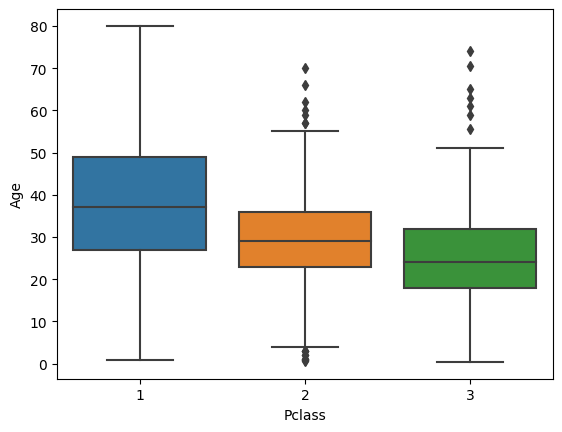

In [ ]:
sns.boxplot(x='Pclass', y='Age', data=df)

**So, lets check the `Age` distribution of each `Pclass`**

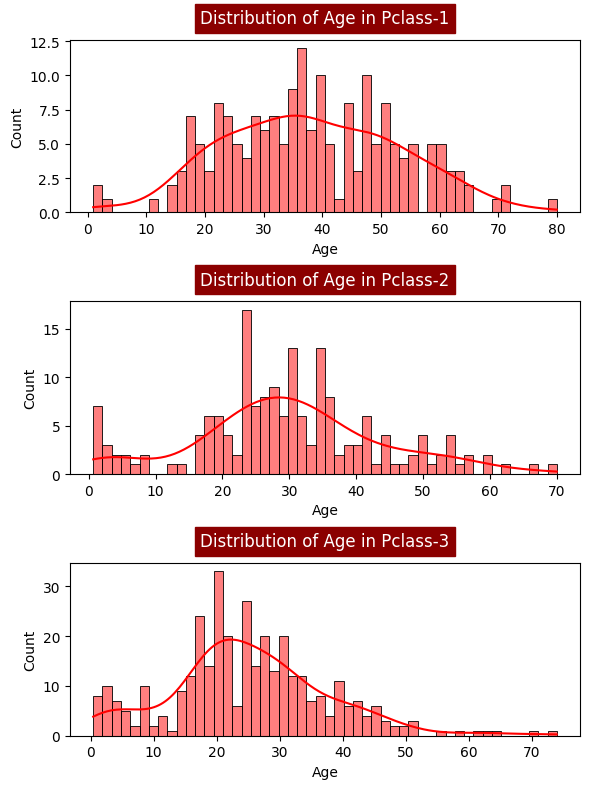

In [ ]:
PCU = df['Pclass'].unique() #Pclass Unique elements

fig, ax = plt.subplots(3,1, figsize=(6,8))
for i in PCU:
    sns.histplot(df['Age'][df['Pclass']==i], bins=50, kde=True, color='red', ax = ax[i-1])
    ax[i-1].set_title(f'Distribution of Age in Pclass-{i}', color='white',
                     backgroundcolor='darkred', pad=12)
plt.tight_layout()
plt.show()

**Here you can see that the distribution in `Class-1` is Normal where in `Class-2` it is more closer to the `Normal Distribution` rather than the `Left Skewed` and in `Class-3` it has `Left Skewed Distribution`. So, lets impute the age values in `Class-1` and `Class-2` with the `mean` while in `Class-3` with the `median`.**

In [ ]:
Pclass_Age_Agg = df.groupby('Pclass')['Age'].agg(['mean','median'])

for index, val in zip(Pclass_Age_Agg.index, Pclass_Age_Agg.values):
    print(f'Mean    value of Age in Pclass-{index}:   {val[0]: .2f}')
    print(f'Median  value of Age in Pclass-{index}:   {val[1]: .2f}')

Mean    value of Age in Pclass-1:    38.23
Median  value of Age in Pclass-1:    37.00
Mean    value of Age in Pclass-2:    29.88
Median  value of Age in Pclass-2:    29.00
Mean    value of Age in Pclass-3:    25.14
Median  value of Age in Pclass-3:    24.00


In [ ]:
pclass_age_map = {1: round(df['Age'][df['Pclass']==1].mean(),2),
                  2: round(df['Age'][df['Pclass']==2].mean(),2),
                  3: round(df['Age'][df['Pclass']==3].median(),2)}

df['Age'].fillna(df['Pclass'].apply(lambda pclass: pclass_age_map[pclass]), inplace=True)

##**Imputation of Embarked**

**Since embarked has only 2 missing values and is categorical variable, so mode imputaion would be better choice here**

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

**No Missing Values Now:**

In [ ]:
df.isnull().sum().sort_values(ascending=0)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#**Correlation**

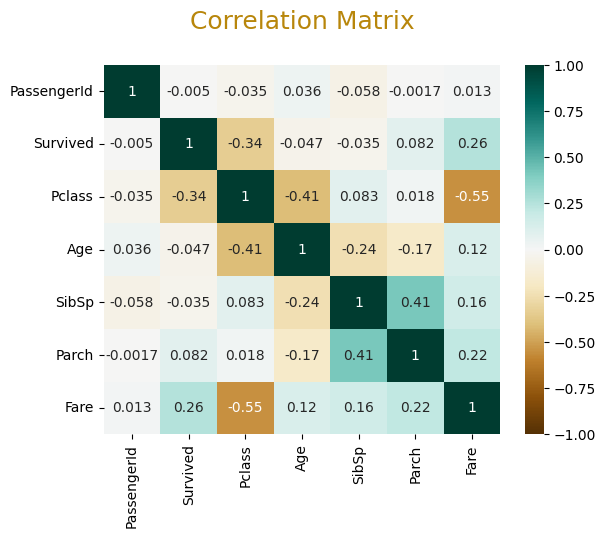

In [ ]:
corr=df.corr(numeric_only=True)

sns.heatmap(corr, annot=True,cmap='BrBG', vmin=-1, vmax=1)

title = 'Correlation Matrix\n'
plt.title(title, loc='center', fontsize=18, color='darkgoldenrod')
plt.show()

**Please note that features with strong negative correlations are just as important as those with positive correlations. Our primary interest lies in the correlation of the target variable, which is `Survived`. Let's take a look at the absolute values of the correlation graph for the target variable.**

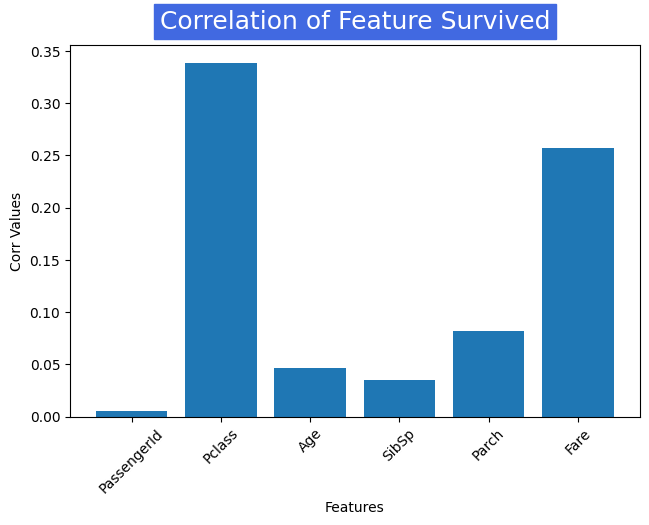

In [ ]:
cs = corr['Survived'] #correlation survived (cs)
cs.drop('Survived',inplace=True)

plt.bar(cs.index,abs(cs.values))
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel('Features')
plt.ylabel('Corr Values')
plt.title('Correlation of Feature Survived', fontsize=18, backgroundcolor = 'royalblue', color='white', pad=12)
plt.show()

As per the expectation, PassengerId is not providing much good information. Lets encode the non-numerical features to numerical and see the relation with the them as well.

#**Data Encoding**

**Feature Sex Encoding**

In [ ]:
sex_dic = {} #dictionary to encode the Sex

for value,key in enumerate(df['Sex'].unique()):
    sex_dic.update({key:value})

df['Encoded_Sex']=df['Sex'].map(sex_dic)

**Feature Embarked Encoding**

Instead of automatically dropping the first column by setting **`drop_first=True`**, <br>
we will choose to drop one that is less correlated with the target variable.

In [ ]:
df_Embarked = pd.get_dummies(df['Embarked'])
df_Embarked.head(5)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
df = pd.concat([df,df_Embarked], axis=1)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Encoded_Sex,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,0,1


**Now lets revise the corelation to take the decision which features to drop**

#**Correlation**

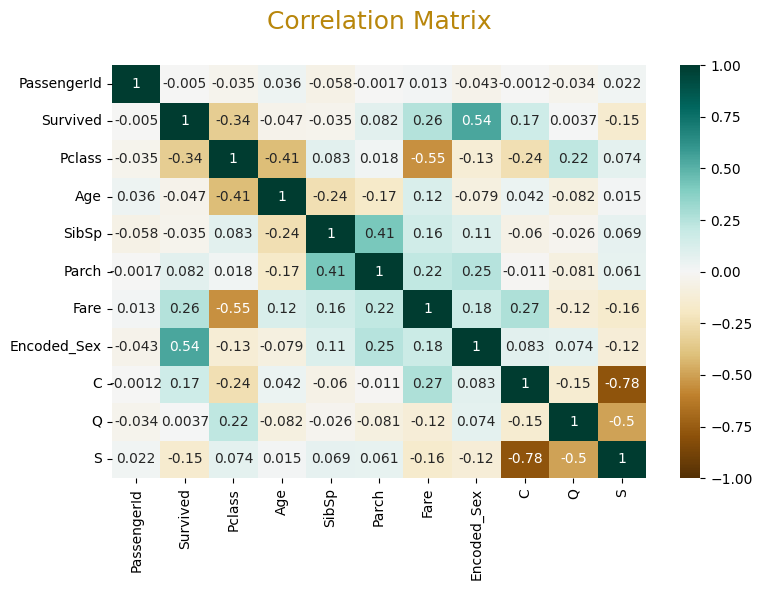

In [ ]:
corr=df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr, annot=True,cmap='BrBG', vmin=-1, vmax=1, ax=ax)

title = 'Correlation Matrix\n'
plt.title(title, loc='center', fontsize=18, color='darkgoldenrod')
plt.tight_layout()
plt.show()

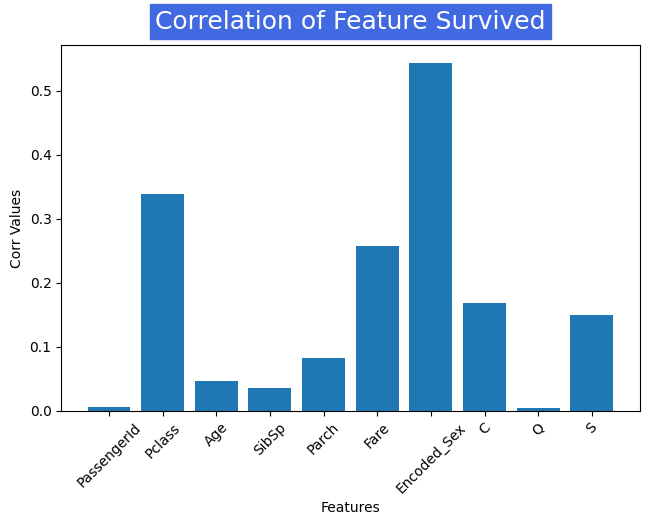

In [ ]:
cs = corr['Survived'] #correlation survived (cs)
cs.drop('Survived',inplace=True)

plt.bar(cs.index,abs(cs.values))
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel('Features')
plt.ylabel('Corr Values')
plt.title('Correlation of Feature Survived', fontsize=18, color = 'white', backgroundcolor='royalblue', pad=12)
plt.show()

**Let's drop the feature `PassengerId`, `Q`, and some other obvious features that definitely have no relation with survival prediction, such as `Name`. Additionally, let's drop the features that have already been encoded.**

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Encoded_Sex', 'C', 'Q', 'S'],
      dtype='object')

In [ ]:
#Desired columns to drop
col_drop = ['PassengerId', 'Name', 'Ticket', 'Sex', 'Embarked', 'Q']

In [ ]:
df.drop(col_drop,axis=1, inplace=True)

In [ ]:
df.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Encoded_Sex,C,S
0,0,3,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,0
2,1,3,26.0,0,0,7.9250,1,0,1
3,1,1,35.0,1,0,53.1000,1,0,1
4,0,3,35.0,0,0,8.0500,0,0,1


#**Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
X=df.drop('Survived',axis=1)
y=df['Survived']

X_train, X_test,y_train,y_test=tts(X,y,test_size=0.3, shuffle=True, stratify=y)

#**Data Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
Scaler = StandardScaler()
Scaler.fit(X_train)
Xtrain_std = Scaler.transform(X_train)
Xtest_std = Scaler.transform(X_test)

#**Models Training**

**Lets Create a list to record the accuracy yield by different models**

In [ ]:
Model = []
Train = []
Test  = []

##**Support Vector Classification**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [ ]:
svc=SVC()
svc.fit(Xtrain_std,y_train)
y_pred=svc.predict(Xtest_std)

train_acc = accuracy_score(y_true=y_train, y_pred=svc.predict(Xtrain_std))*100
test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100

print(f'Training Accuracy:   {train_acc: .2f}\nTest Accuracy    :   {test_acc: .2f}\n')
print(f'CLASSIFICATION REPORT: \n\n{classification_report(y_test,y_pred)}')
print(f'CONFUSION MATRIX: \n\n{confusion_matrix(y_test,y_pred)}')

Training Accuracy:    85.39
Test Accuracy    :    80.97

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       165
           1       0.86      0.60      0.71       103

    accuracy                           0.81       268
   macro avg       0.83      0.77      0.78       268
weighted avg       0.82      0.81      0.80       268

CONFUSION MATRIX: 

[[155  10]
 [ 41  62]]


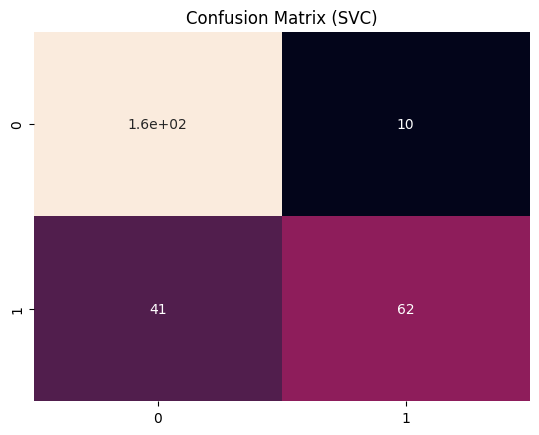

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cbar=0)
plt.title('Confusion Matrix (SVC)')
plt.show()

In [ ]:
Model.append('SVC')
Train.append(train_acc)
Test.append(test_acc)

##**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(Xtrain_std, y_train)
y_pred=lr.predict(Xtest_std)

train_acc = accuracy_score(y_true=y_train, y_pred=lr.predict(Xtrain_std))*100
test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100

print(f'Training Accuracy:   {train_acc: .2f}\nTest Accuracy    :   {test_acc: .2f}\n')
print(f'CLASSIFICATION REPORT: \n\n{classification_report(y_test,y_pred)}')
print(f'CONFUSION MATRIX: \n\n{confusion_matrix(y_test,y_pred)}')

Training Accuracy:    81.06
Test Accuracy    :    80.97

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       165
           1       0.81      0.66      0.73       103

    accuracy                           0.81       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.81      0.81       268

CONFUSION MATRIX: 

[[149  16]
 [ 35  68]]


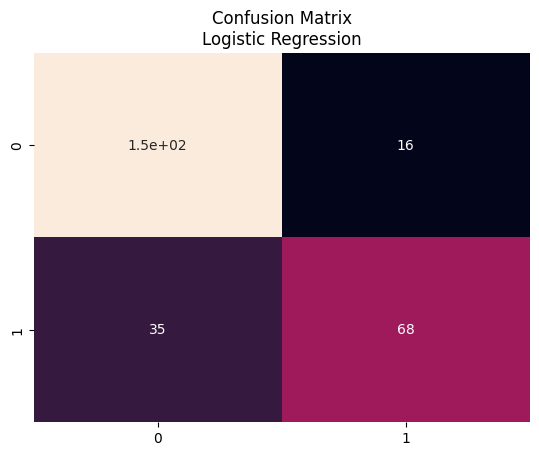

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cbar=0)
plt.title('Confusion Matrix\nLogistic Regression')
plt.show()

In [ ]:
Model.append('Logistic Reg')
Train.append(train_acc)
Test.append(test_acc)

##**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

**Let find the optimize k**

In [ ]:
neighbors = np.arange(1,50,2,dtype='int')
Accuracy_List = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtrain_std,y_train)
    y_pred=knn.predict(Xtest_std)

    train_acc = accuracy_score(y_true=y_train, y_pred=knn.predict(Xtrain_std))*100
    test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100
    acc = [k, round(train_acc,2), round(test_acc,2)]
    Accuracy_List.append(acc)

In [ ]:
K_df = pd.DataFrame(Accuracy_List, columns= ["k", "Train Accuracy", "Test Accuracy"])
K_df.head(5)

,k,Train Accuracy,Test Accuracy
0,1,99.04,75.75
1,3,87.80,78.36
2,5,86.04,81.72
3,7,84.75,81.34
4,9,85.07,80.22


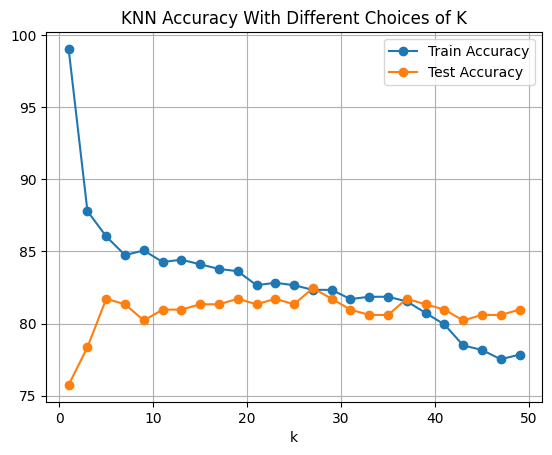

In [ ]:
#Lets analyze the best K
K_df.plot(kind='line',marker='o',x='k')
plt.title('KNN Accuracy With Different Choices of K')
plt.grid('on')
plt.show()

In [ ]:
K=27

In [ ]:
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(Xtrain_std,y_train)
y_pred=knn.predict(Xtest_std)

train_acc = accuracy_score(y_true=y_train, y_pred=knn.predict(Xtrain_std))*100
test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100

print(f'Training Accuracy:   {train_acc: .2f}\nTest Accuracy    :   {test_acc: .2f}\n')
print(f'CLASSIFICATION REPORT: \n\n{classification_report(y_test,y_pred)}')
print(f'CONFUSION MATRIX: \n\n{confusion_matrix(y_test,y_pred)}')

Training Accuracy:    82.34
Test Accuracy    :    82.46

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       165
           1       0.84      0.67      0.75       103

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268

CONFUSION MATRIX: 

[[152  13]
 [ 34  69]]


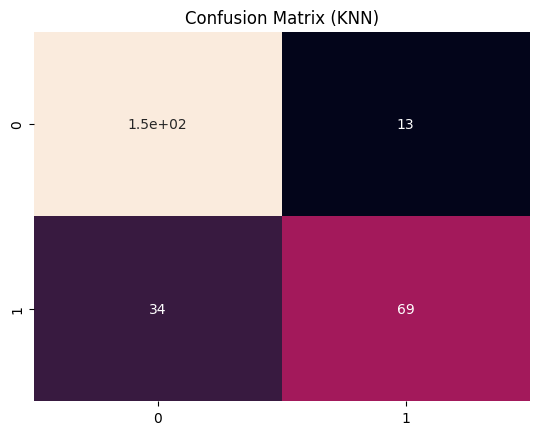

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cbar=0)
plt.title('Confusion Matrix (KNN)')
plt.show()

In [ ]:
Model.append('KNN')
Train.append(train_acc)
Test.append(test_acc)

##**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'max_depth': [1, 3, 5, 7, 9, 10, 12, None], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [  1, 2, 4, 8, 10]}

# Create the DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy', max_features='sqrt', random_state=32)

# Create the GridSearchCV object
grid_search = GridSearchCV(DT, param_grid, cv=5, scoring='accuracy')

# Fit the model with the data
grid_search.fit(Xtrain_std, y_train)  # Replace X_train and y_train with your training data

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_dt_classifier = grid_search.best_estimator_

Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 15}


In [ ]:
best_dt_classifier

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=15,
                       random_state=32)

In [ ]:
DT = best_dt_classifier
DT.fit(Xtrain_std,y_train)
y_pred=DT.predict(Xtest_std)

train_acc = accuracy_score(y_true=y_train, y_pred=DT.predict(Xtrain_std))*100
test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100

print(f'Training Accuracy:   {train_acc: .2f}\nTest Accuracy    :   {test_acc: .2f}\n')
print(f'CLASSIFICATION REPORT: \n\n{classification_report(y_test,y_pred)}')
print(f'CONFUSION MATRIX: \n\n{confusion_matrix(y_test,y_pred)}')

Training Accuracy:    84.75
Test Accuracy    :    77.24

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           0       0.78      0.87      0.83       165
           1       0.75      0.61      0.67       103

    accuracy                           0.77       268
   macro avg       0.77      0.74      0.75       268
weighted avg       0.77      0.77      0.77       268

CONFUSION MATRIX: 

[[144  21]
 [ 40  63]]


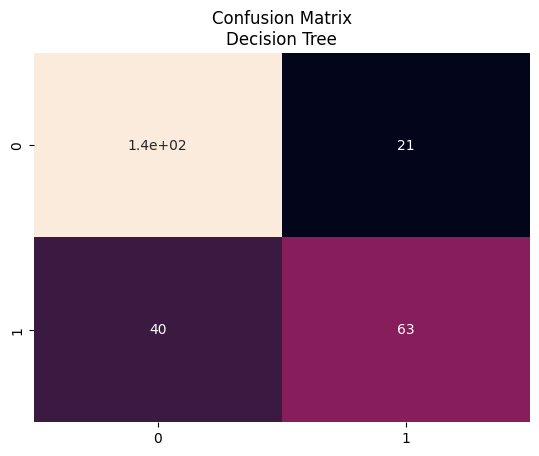

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cbar=0)
plt.title('Confusion Matrix\nDecision Tree')
plt.show()

In [ ]:
Model.append('Dec. Tree')
Train.append(train_acc)
Test.append(test_acc)

##**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
estimator = np.arange(1,50,dtype='int')
Accuracy_List = []
for n in estimator:
    RF = RandomForestClassifier(n_estimators=n)
    RF.fit(Xtrain_std,y_train)
    y_pred=RF.predict(Xtest_std)

    train_acc = accuracy_score(y_true=y_train, y_pred=RF.predict(Xtrain_std))*100
    test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100
    acc = [n, round(train_acc,2), round(test_acc,2)]
    Accuracy_List.append(acc)

In [ ]:
N_df = pd.DataFrame(Accuracy_List, columns= ["n", "Train Accuracy", "Test Accuracy"])
N_df.head(5)

,n,Train Accuracy,Test Accuracy
0,1,89.41,73.51
1,2,92.30,74.63
2,3,94.70,78.73
3,4,94.54,76.12
4,5,95.67,76.49


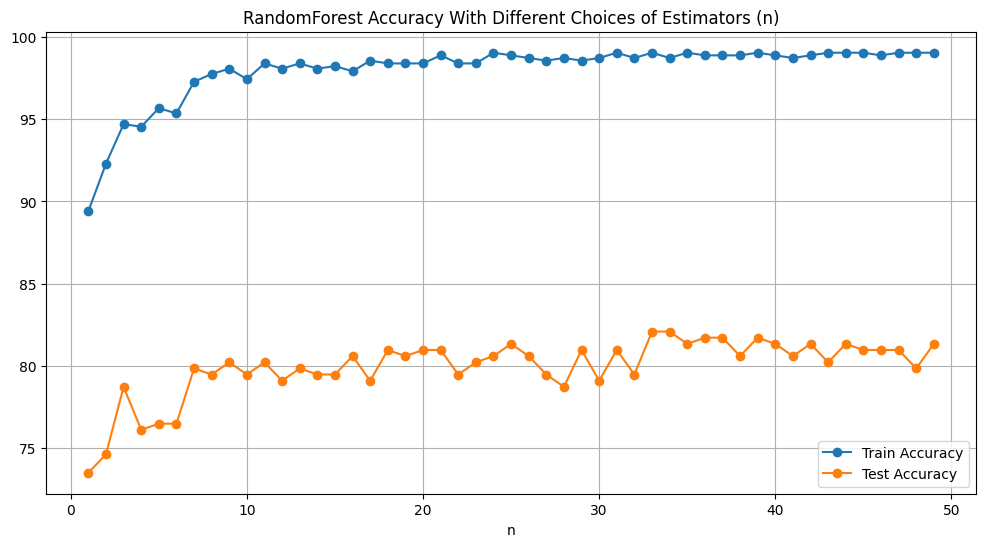

In [ ]:
#Lets analyze the best estimator n
fig,ax=plt.subplots(figsize=(12,6))
N_df.plot(kind='line',marker='o',x='n',ax=ax)
plt.title('RandomForest Accuracy With Different Choices of Estimators (n)')
plt.grid()
plt.show()

In [ ]:
n=33

In [ ]:
RF = RandomForestClassifier(n_estimators=n)
RF.fit(Xtrain_std,y_train)
y_pred=RF.predict(Xtest_std)

train_acc = accuracy_score(y_true=y_train, y_pred=RF.predict(Xtrain_std))*100
test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100

print(f'Training Accuracy:   {train_acc: .2f}\nTest Accuracy    :   {test_acc: .2f}\n')
print(f'CLASSIFICATION REPORT: \n\n{classification_report(y_test,y_pred)}')
print(f'CONFUSION MATRIX: \n\n{confusion_matrix(y_test,y_pred)}')

Training Accuracy:    98.56
Test Accuracy    :    81.34

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       165
           1       0.80      0.69      0.74       103

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268

CONFUSION MATRIX: 

[[147  18]
 [ 32  71]]


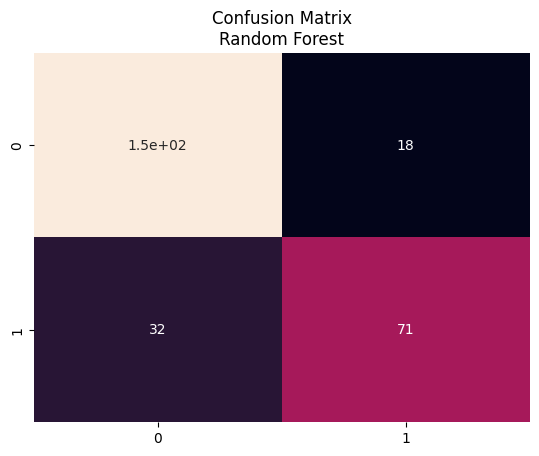

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cbar=0)
plt.title('Confusion Matrix\nRandom Forest')
plt.show()

In [ ]:
Model.append('Rand. Forest')
Train.append(train_acc)
Test.append(test_acc)

##**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
estimator = np.arange(1,70,dtype='int')
Accuracy_List = []
for n in estimator:
    GBC = GradientBoostingClassifier(n_estimators=n)
    GBC.fit(Xtrain_std,y_train)
    y_pred=GBC.predict(Xtest_std)

    train_acc = accuracy_score(y_true=y_train, y_pred=GBC.predict(Xtrain_std))*100
    test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100
    acc = [n, round(train_acc,2), round(test_acc,2)]
    Accuracy_List.append(acc)

In [ ]:
N_df = pd.DataFrame(Accuracy_List, columns= ["n", "Train Accuracy", "Test Accuracy"])
N_df.head(5)

,n,Train Accuracy,Test Accuracy
0,1,61.64,61.57
1,2,61.64,61.57
2,3,78.65,78.73
3,4,78.65,78.73
4,5,79.94,80.22


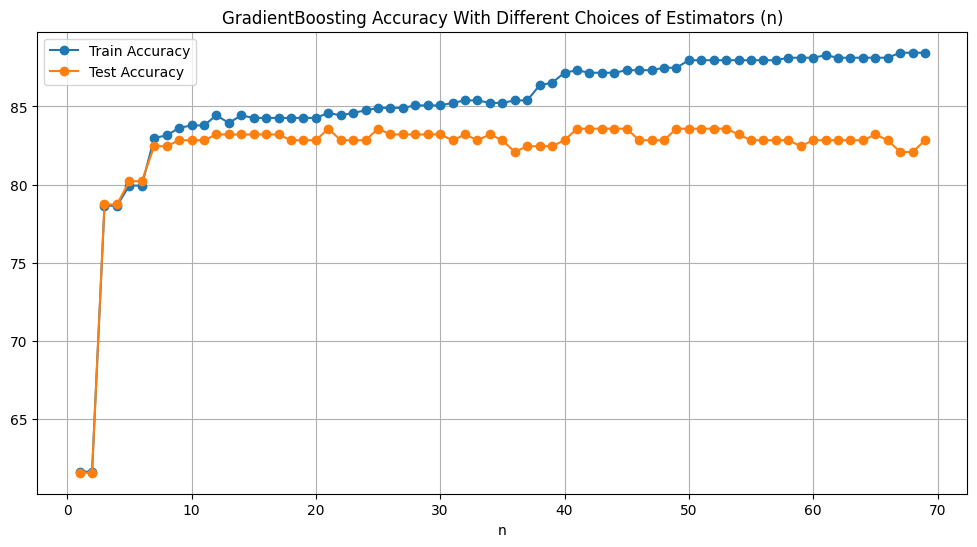

In [ ]:
#Lets analyze the best estimator n
fig,ax=plt.subplots(figsize=(12,6))
N_df.plot(kind='line',marker='o',x='n',ax=ax)
plt.title('GradientBoosting Accuracy With Different Choices of Estimators (n)')
plt.grid('on')
plt.show()

In [ ]:
n=21

In [ ]:
GBC = GradientBoostingClassifier(n_estimators=n)
GBC.fit(Xtrain_std,y_train)
y_pred=GBC.predict(Xtest_std)

train_acc = accuracy_score(y_true=y_train, y_pred=GBC.predict(Xtrain_std))*100
test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)*100

print(f'Training Accuracy:   {train_acc: .2f}\nTest Accuracy    :   {test_acc: .2f}\n')
print(f'CLASSIFICATION REPORT: \n\n{classification_report(y_test,y_pred)}')
print(f'CONFUSION MATRIX: \n\n{confusion_matrix(y_test,y_pred)}')

Training Accuracy:    84.59
Test Accuracy    :    83.58

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       165
           1       0.88      0.66      0.76       103

    accuracy                           0.84       268
   macro avg       0.85      0.80      0.82       268
weighted avg       0.84      0.84      0.83       268

CONFUSION MATRIX: 

[[156   9]
 [ 35  68]]


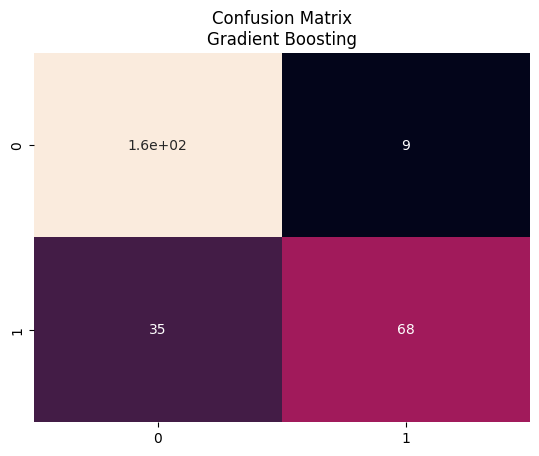

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cbar=0)
plt.title('Confusion Matrix\nGradient Boosting')
plt.show()

In [ ]:
Model.append('Grad. Boosting')
Train.append(train_acc)
Test.append(test_acc)

In [ ]:
data = {'Train': Train, 'Test':Test}
acc_df = pd.DataFrame(data=data, index=Model)
acc_df.index.name = 'Model / Accuracy'
acc_df

,Train,Test
Model / Accuracy,,
SVC,85.393258,80.970149
Logistic Reg,81.059390,80.970149
KNN,82.343499,82.462687
Dec. Tree,84.751204,77.238806
Rand. Forest,98.555377,81.343284
Grad. Boosting,84.590690,83.582090


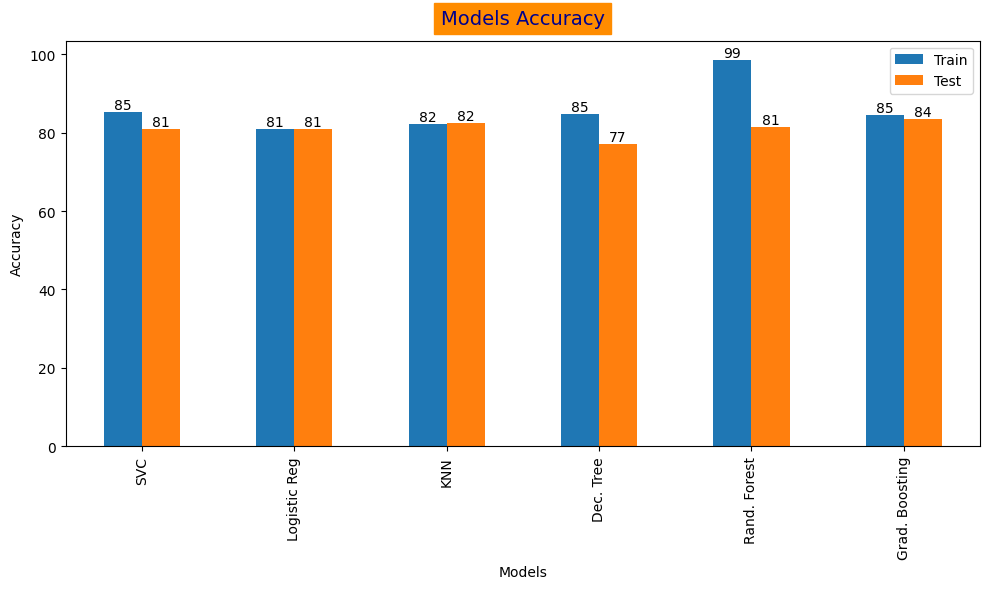

In [ ]:
fig, axis = plt.subplots(figsize=(10,6))
ax = acc_df.plot(kind='bar', ax=axis)
# Add annotations to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.title('Models Accuracy', color='darkblue', backgroundcolor='darkorange', pad=12, fontsize=14)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

**Hence the model `GradientBoosting` perform better than the all others classifiers**